In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [33]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [34]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [36]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [37]:
len(dataset)

68

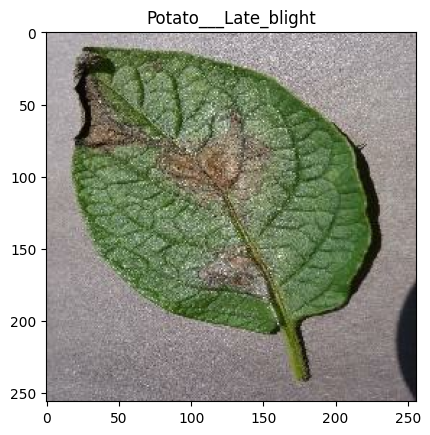

In [38]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) 
    


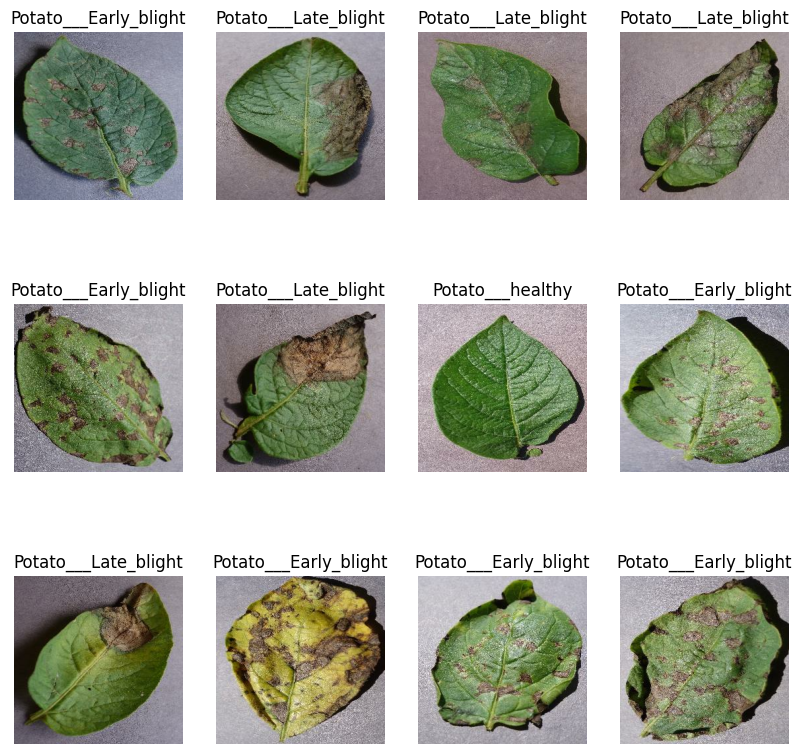

In [39]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off") #to remove axis
        
   
    

In [ ]:
# 80% data as training 20%
# 20% => 10% validation(to check during epochs) 10% test

In [40]:
train_ds = dataset.take(54)  #0.8 *68
len(train_ds)

54

In [41]:
test_ds = dataset.skip(54) #after 54(remaining)
len(test_ds)

14

In [42]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [43]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [44]:
#optimized for training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [45]:
#scailing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [46]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [48]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation
])

In [49]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
    
])

model.build(input_shape=input_shape)

In [50]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose =1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 59s 928ms/step - loss: 0.9119 - accuracy: 0.4873 - val_loss: 0.8195 - val_accuracy: 0.5521
Epoch 2/50
54/54 [==============================] - 49s 913ms/step - loss: 0.6889 - accuracy: 0.7153 - val_loss: 0.4815 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 48s 880ms/step - loss: 0.4050 - accuracy: 0.8287 - val_loss: 0.3110 - val_accuracy: 0.8802
Epoch 4/50
54/54 [==============================] - 49s 903ms/step - loss: 0.3244 - accuracy: 0.8686 - val_loss: 0.4542 - val_accuracy: 0.8125
Epoch 5/50
54/54 [==============================] - 50s 930ms/step - loss: 0.3324 - accuracy: 0.8704 - val_loss: 0.2554 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 48s 883ms/step - loss: 0.2674 - accuracy: 0.8947 - val_loss: 0.4921 - val_accuracy: 0.8177
Epoch 7/50
54/54 [==============================] - 48s 893ms/step - loss: 0.2483 - accuracy: 0.8993 - val_loss: 0.1887 - val_accuracy: 0.9219

54/54 [==============================] - 49s 902ms/step - loss: 0.0135 - accuracy: 0.9931 - val_loss: 0.2003 - val_accuracy: 0.9583
Epoch 42/50
54/54 [==============================] - 50s 921ms/step - loss: 0.0160 - accuracy: 0.9936 - val_loss: 0.0338 - val_accuracy: 0.9792
Epoch 43/50
54/54 [==============================] - 50s 931ms/step - loss: 0.0075 - accuracy: 0.9965 - val_loss: 0.0274 - val_accuracy: 0.9896
Epoch 44/50
54/54 [==============================] - 49s 912ms/step - loss: 0.0210 - accuracy: 0.9942 - val_loss: 0.0771 - val_accuracy: 0.9792
Epoch 45/50
54/54 [==============================] - 50s 918ms/step - loss: 0.0723 - accuracy: 0.9705 - val_loss: 0.0819 - val_accuracy: 0.9740
Epoch 46/50
54/54 [==============================] - 51s 941ms/step - loss: 0.0262 - accuracy: 0.9902 - val_loss: 0.0623 - val_accuracy: 0.9792
Epoch 47/50
54/54 [==============================] - 50s 928ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.4617 - val_accuracy: 0.9010
Epoc

In [54]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 322ms/step - loss: 0.0594 - accuracy: 0.9741


In [55]:
scores

[0.05941450223326683, 0.9741379022598267]

First image to predict
actual label:Potato___healthy
1/1 [==============================] - 0s 388ms/step
predicted_label: Potato___healthy


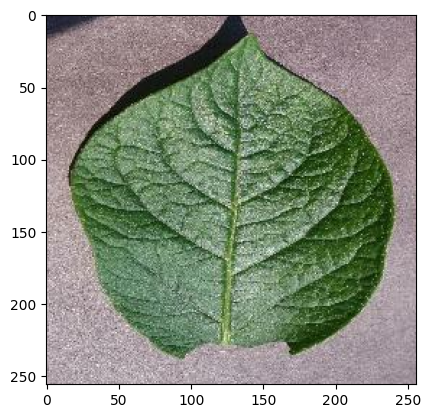

In [71]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)  
    print("actual label:"+class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted_label:",class_names[np.argmax(batch_prediction[0])])

In [73]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 89ms/step


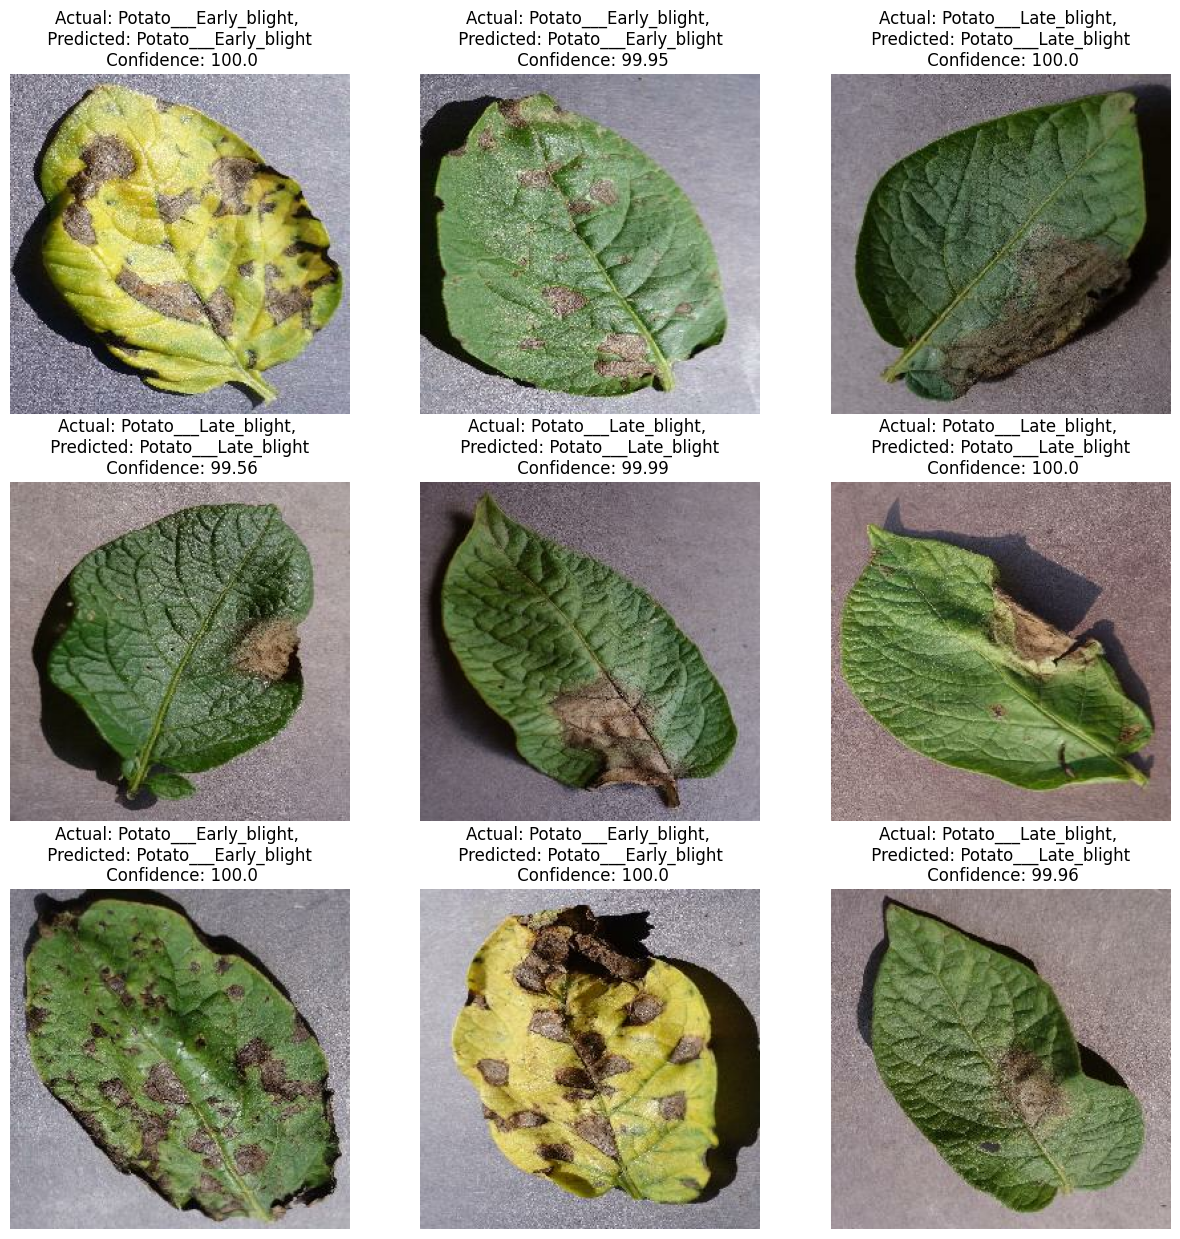

In [74]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class} \n Confidence: {confidence}")
        plt.axis("off")

In [78]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
